In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function
from __future__ import division

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean
import scipy.misc as spm
from matplotlib import pyplot
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_random_state
from sklearn.utils import check_array
from PIL import Image

In [ ]:
class KMeans(BaseEstimator, ClusterMixin):

    def __init__(self, n_clusters=10, max_iter=150, tol=1e-3,
                 verbose=0, random_state=None):
      
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.random_state = random_state

    def _check_fit_data(self, X):
        X = check_array(X, dtype=np.float64)

        n_samples, n_features = X.shape
        if n_samples < self.n_clusters:
            raise ValueError("Number of samples="+str(n_samples)+" should be\
                greater than number of clusters="+str(self.n_clusters))
        return X

    def _check_test_data(self, X):
        X = check_array(X, dtype=np.float64)
                      
        n_samples, n_features = X.shape
        expected_n_features = self.centroids_.shape[1]
        if not expected_n_features == n_features:
            raise ValueError("Incorrect number of features")
        return X

    def _update_centroids(self, X):
        for j in range(self.n_clusters):
            mask = self.labels_==j
            if np.sum(mask) == 0:
                raise ValueError("Bad Cluster")
            temp = X[mask]
            count = np.shape(temp)[0]
            self.centroids_[j] = np.sum(temp, axis=0)/count

    def _update_dist(self, X, dist):
        n_samples = X.shape[0]
        for j in range(n_samples):
            for k in range(self.n_clusters):
                cost = euclidean(X[j], self.centroids_[k])
                dist[j, k] = cost

    def fit(self, X, y=None, sample_weight=None):
        X = self._check_fit_data(X)

        if self.max_iter <= 0:
            raise ValueError("Maximum number of iterations must be greater \
                than zero")

        n_samples, n_features=X.shape

        rs = check_random_state(self.random_state)
        self.labels_ = np.zeros((n_samples))
        centroids_idx = rs.randint(n_samples, size=self.n_clusters)
        self.centroids_ = X[centroids_idx]

        dist = np.zeros((n_samples, self.n_clusters))

        for itr in range(self.max_iter):
            dist.fill(0)           
            self._update_dist(X, dist)
            labels_old = self.labels_
            self.labels_ = dist.argmin(axis=1)
            
            n_same = np.sum(self.labels_ == labels_old)
            if 1-n_same/n_samples < self.tol:
                if self.verbose:
                    print("Converged at iteration "+ str(itr+1))
                break           
            self._update_centroids(X)
            
        self.X_fit_ = X
        return self

    def predict(self, X):
        X = self._check_test_data(X)
        n_samples = X.shape[0]
        dist = np.zeros((n_samples, self.n_clusters))
        self._update_dist(X, dist)
        return dist.argmin(axis=1)

In [ ]:
def lena():
    import pickle, os
    fname = "/content/drive/MyDrive/lena.dat"
    f = open(fname,'rb')
    lena = np.array(pickle.load(f))
    f.close()
    return lena

In [ ]:
def segmentImage():
    from skimage.transform import resize
    from skimage import data
    img = lena()
    resize(img, (100, 100))
    height, width = img.shape
    clf = KMeans(n_clusters=5, max_iter=100, random_state=0, verbose=1)
    img_list = np.reshape(img, (height*width, 1))
    clf.fit(img_list)
    index = np.copy(clf.labels_)
    index = np.reshape(index, (height, width))
    axes = pyplot.gca()
    axes.imshow(index)
    pyplot.show(block=True)

Converged at iteration 24


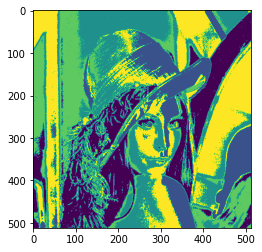

In [ ]:
def clusterToyData():
    from sklearn.datasets import make_blobs
    from skimage.transform import resize
    from skimage import data
    img = lena()
    resize(img, (100, 100))
    height, width = img.shape
    X, y = make_blobs(n_samples=1000, centers=5, random_state=0)
   
    clf = KMeans(n_clusters=2, max_iter=100, random_state=0, verbose=1)

    print(clf.fit_predict(X)[:50])
    print(clf.predict(X)[:50])
    img_list = np.reshape(img, (height*width, 1))
    clf.fit(img_list)
    index = np.copy(clf.labels_)
    index = np.reshape(index, (height, width))
    axes = pyplot.gca()
    axes.imshow(index)
    pyplot.show(block=True)

segmentImage()


Converged at iteration 8
[0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0]
Converged at iteration 5


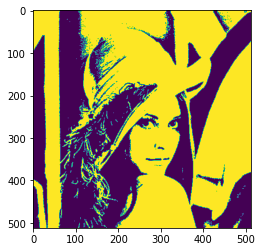

In [ ]:
clusterToyData()